In [1]:
!pip install --upgrade tensorflow==2.0

Requirement already up-to-date: tensorflow==2.0 in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
import tensorflow as tf

In [3]:
print(tf.__version__) #######version

2.0.0


In [0]:
from tensorflow.keras.datasets import mnist     

In [0]:
(train_images , train_labels),(test_images , test_labels) =mnist.load_data()

In [6]:
train_images[0]   ######### 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
train_images.ndim

3

In [8]:
train_images[0].ndim     ####### dimension (rank)

2

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_images[0].shape

(28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
train_labels[0]

5

In [13]:
train_labels[1]

0

In [14]:
train_labels[2]

4

In [15]:
for i in range(11):
  print(train_labels[i])

5
0
4
1
9
2
1
3
1
4
3


In [16]:
for p in range(10):
  print(p)

0
1
2
3
4
5
6
7
8
9


## **Listing 2.2 The network architectur**

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## **2.3 The compilation step**

In [0]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

## **Listing 2.4 Preparing the image data**

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255


test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [20]:
train_images.dtype

dtype('float32')

In [21]:
train_images[0] ##now in 0 and 1 form all 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## **Listing 2.5 Preparing the labels**

In [0]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
network.fit(train_images, train_labels, epochs=16, batch_size=500) 

### if we run this command on tensorflow 2.1 version then there will be a
#  error "InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[128,10] 
#labels_size=[1280,2] [[node loss/dense_5_loss/softmax_cross_entropy_with_logits 
#(defined at <ipython-input-130-8b04f355273b>:1) ]] 
#[Op:__inference_distributed_function_2067]Function call stack:distributed_function site:stackoverflow.com" 
#thats why i run this on 2.0 . why there is a error on 2.1 version

Train on 60000 samples
Epoch 1/16
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3848 - accuracy: 0.8910
Epoch 2/16
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1691 - accuracy: 0.9516
Epoch 3/16
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1163 - accuracy: 0.9666
Epoch 4/16
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0868 - accuracy: 0.9747
Epoch 5/16
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0675 - accuracy: 0.9804
Epoch 6/16
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0536 - accuracy: 0.9848
Epoch 7/16
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0432 - accuracy: 0.9875
Epoch 8/16
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0353 - accuracy: 0.9902
Epoch 9/16
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0293 - accuracy: 0.9921
Epoch 10/16
60

In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [46]:
print('test_acc:', test_acc)

test_acc: 0.9806


In [26]:
network.predict(train_images)[0]

array([6.38292398e-17, 5.44536179e-15, 4.13545274e-11, 5.82470151e-04,
       1.15001515e-23, 9.99417543e-01, 1.67122973e-20, 1.04039309e-13,
       2.21728899e-14, 1.10351854e-12], dtype=float32)

## **DATA VISUALIZATION**

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(train_images , train_labels),(test_images , test_labels) =mnist.load_data()

In [29]:
print(train_images.ndim)

3


In [30]:
print(train_images.shape)

(60000, 28, 28)


In [31]:
print(train_images.dtype)

uint8


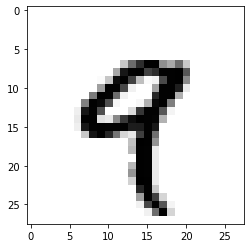

In [32]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

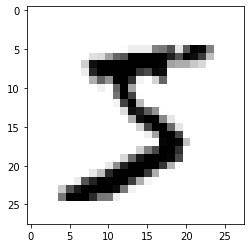

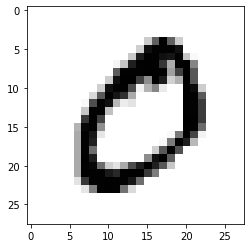

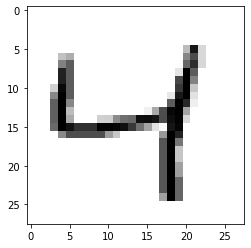

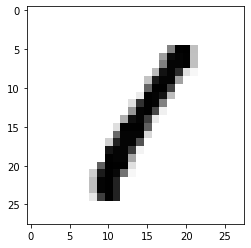

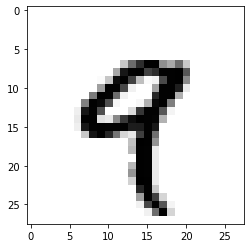

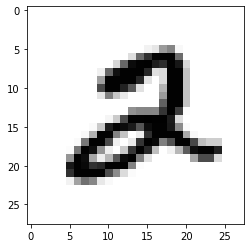

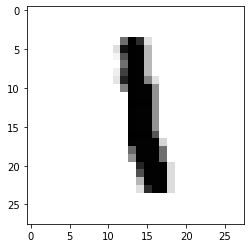

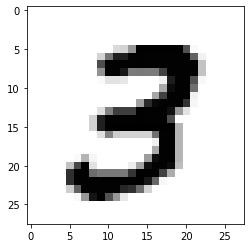

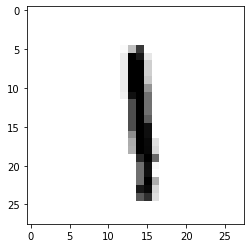

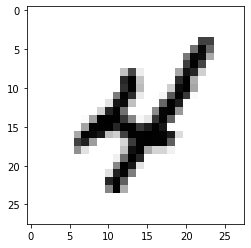

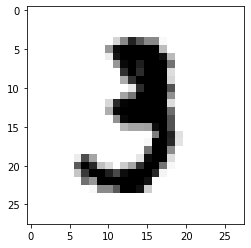

In [33]:
for atg in range(11):
  digit = train_images[atg]
  import matplotlib.pyplot as plt
  plt.imshow(digit, cmap=plt.cm.binary)
  plt.show()

In [0]:
#done 